In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('../Dataset/country_wise_latest.csv')


In [6]:
df1=pd.DataFrame(df)
df1

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [8]:
new_df=df.dropna()
new_df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [9]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Length: 187, dtype: bool


In [11]:
#Top 10 countries by Total Cases
top_countries= df.sort_values(by="Confirmed", ascending=False).head(10)[["Country/Region", "Confirmed"]]
print(top_countries)

     Country/Region  Confirmed
173              US    4290259
23           Brazil    2442375
79            India    1480073
138          Russia     816680
154    South Africa     452529
111          Mexico     395489
132            Peru     389717
35            Chile     347923
177  United Kingdom     301708
81             Iran     293606


In [12]:
import matplotlib.pyplot as plt


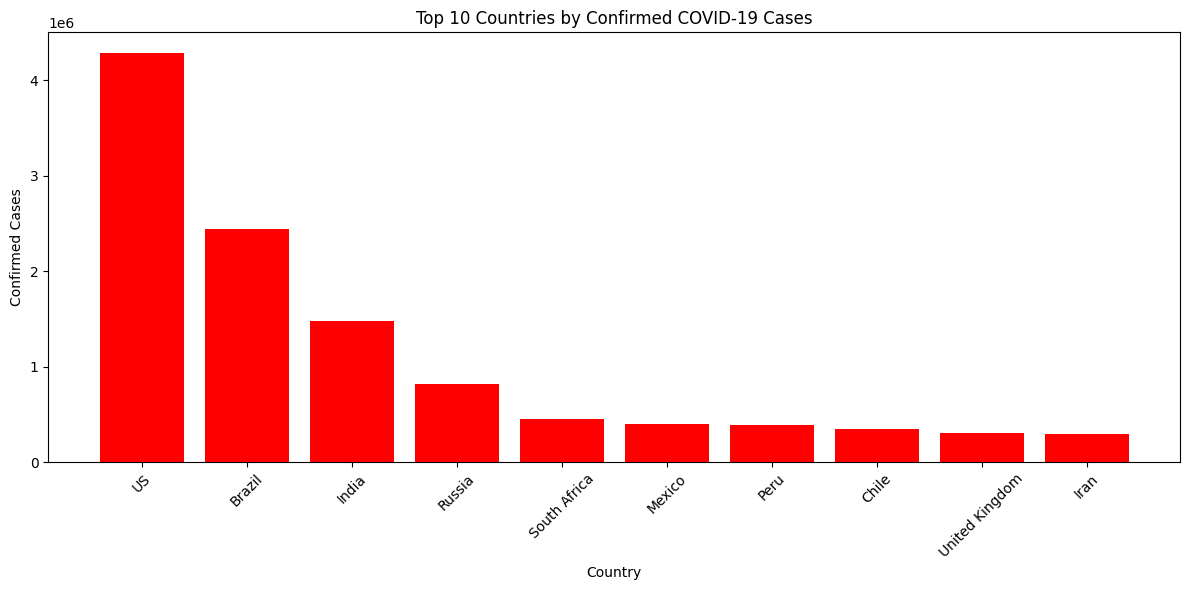

In [26]:
#Create the bar chart
plt.figure(figsize=(12,6))
# Add titles and labels
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.bar(top_countries['Country/Region'], top_countries["Confirmed"],color="Red")

# Show the chart
plt.tight_layout()
plt.show()

In [29]:
region_death_totals=df.groupby("WHO Region")["Deaths"].sum().sort_values(ascending=False)
print(region_death_totals)

WHO Region
Americas                 342732
Europe                   211144
South-East Asia           41349
Eastern Mediterranean     38339
Africa                    12223
Western Pacific            8249
Name: Deaths, dtype: int64


In [30]:
import matplotlib.pyplot as plt

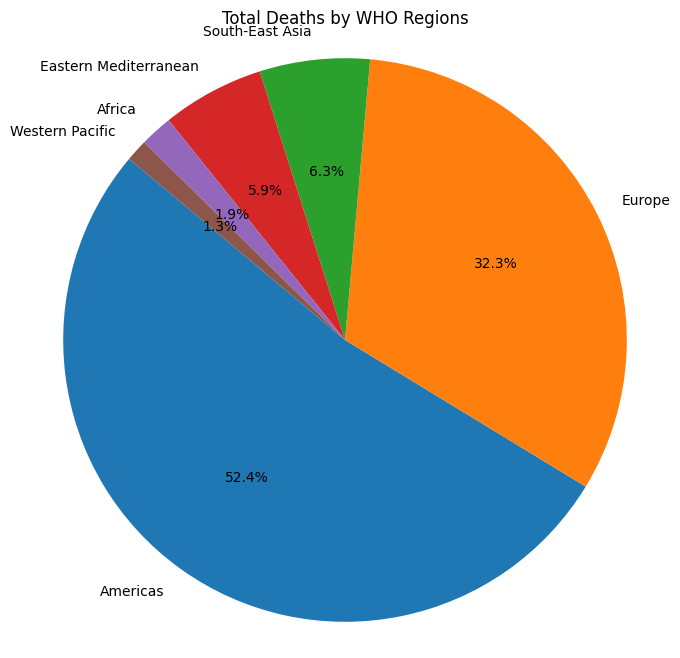

In [31]:
region_death_totals.plot(
    kind="pie",
    figsize=(8, 8),
    title="Total Deaths by WHO Regions",
    labels=region_death_totals.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.ylabel("")  # Optional: removes default y-label
plt.axis("equal")  # Makes the pie a circle
plt.show()


In [33]:
#Measuring Recovery and Fatality Rate
top_recovered = df[["Country/Region", "Recovered / 100 Cases"]].sort_values(by="Recovered / 100 Cases" , ascending=False)
print(top_recovered.head(10))

    Country/Region  Recovered / 100 Cases
49        Dominica                 100.00
75        Holy See                 100.00
69         Grenada                 100.00
48        Djibouti                  98.38
78         Iceland                  98.33
24          Brunei                  97.87
121    New Zealand                  97.24
136          Qatar                  97.02
105       Malaysia                  96.60
110      Mauritius                  96.51


In [34]:
high_ratio= df[["Country/Region", "Deaths / 100 Recovered"]].sort_values(by="Deaths / 100 Recovered", ascending=False)
print(high_ratio.head(10))

     Country/Region  Deaths / 100 Recovered
32           Canada                     inf
163           Syria                     inf
117      Mozambique                     inf
147          Serbia                     inf
161          Sweden                     inf
120     Netherlands                 3259.26
177  United Kingdom                 3190.26
184           Yemen                   57.98
16          Belgium                   56.28
61           France                   37.20


In [ ]:
#Spotting Fast-Growing Outbreaks
